# Analysis of Major Pollutants in Delhi

We are aware of how pollution is a major crisis in Delhi.
This project tries to analyse the impact of major events in Delhi's Air pollution
We will plot the various pollutants in Delhi and use several graphs to visualise the Data

# My Jupyter notebook covers  -
   
*  Analysis of  pollution levels in delhi over the years from 2015 to 2020
*  Effect of lockdown on pollution level of delhi
*  Effect of Major events like Stubble Burning or Diwali on Air Quality During year end

# About Dataset

The dataset contains air quality data and AQI (Air Quality Index) at  daily level of various stations across multiple cities in India but I am using only delhi's data for analysis.

The data has been made publicly available by the Central Pollution Control Board: https://cpcb.nic.in/ which is the official portal of Government of India. They also have a real-time monitoring app: https://app.cpcbccr.com/AQI_India/

# Air-Pollution-everything-you-need-know 

## Things You Should Know

There are many factors that contribute to the worsening of Air Quality. In this dataset there are 12 major pollutants that are used to calculate the AQI of a particular area
* PM2.5 (Particulate Matter of 2.5 Microns)
* PM10 (Particulate Matter of 10 Microns)
* NO (Nitrogen Oxide)
* NO2 (Nitrogen Dioxide)
* NH3 (Nitrogen Hydride)
* CO (Carbon Monoxide)
* SO2 (Sulphur Dioxide)
* O3 (Ozone)
* BENZENE
* TOLUENE
* XYLENE


### Particular matter

Particulate matter is a mix of solids and liquids, including carbon, complex organic chemicals, sulphates, nitrates, mineral dust, and water suspended in the air.

PM varies in size. Some particles, such as dust, soot, dirt or smoke are large or dark enough to be seen with the naked eye. But the most damaging particles are the smaller particles, known as PM10 and PM2.5. PM10 refers to particles with a diameter smaller than 10 microns (10µm) – that’s 100 times smaller than a millimetre. PM2.5 refers to particles with a diameter smaller than 2.5 microns, and these are known as fine particles. The smallest fine particles, less than 0.1 micron in diameter, are called ultrafine particles.

### Nitrogen dioxide (NO2)

Nitrogen dioxide is a gas and is a major component of urban air pollution episodes.Man-made sources of nitrogen oxides(NO), including nitrogen dioxide(NO2), are vehicles, power stations and heating. Diesel vehicles are major contributors in urban areas. Roadside levels are highest where traffic is busiest.

### Ozone (O3)

Ozone is a gas composed of 3 atoms of oxygen. In the upper level of the Earth’s atmosphere, it absorbs harmful ultraviolet radiation.Near the ground, ozone is made by a chemical reaction between the sun’s rays and organic gases and oxides of nitrogen emitted by cars, power plants, chemical plants and other sources.Ozone is usually highest in the spring and summer and lowest in the winter. Ozone levels are highest during the afternoon and are often higher in the country than in towns. Ozone is a major component of summer air pollution episodes.

### Sulphur dioxide (SO2)

Sulphur dioxide is a colourless gas, with a pungent, suffocating smell. It’s produced by burning sulphur-containing fuels such as coal and oil. This includes vehicles, power generation and heating.
Most sulphur dioxide comes from electric industries that burn fossil fuels, and also from petrol refineries and cement manufacturing. It can travel over long distances and contributes to the formation of ozone.



## Step 1 - Data Fetching

# Importing necessary libraries

In [139]:
import numpy as np 
import pandas as pd 
import os

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning,DeprecationWarning))

pd.options.mode.chained_assignment = None  # default='warn'


# Importing datset

In [140]:
url='city_day.csv'
city_day_data=pd.read_csv(url)

# Extract delhi's data 

delhi_data=city_day_data.groupby('City').get_group('Delhi')


In [141]:
delhi_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


## Step 2 - Data Cleaning

# Handling Missing values

In [142]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [143]:
missing_values_table(delhi_data)

Your selected dataframe has 16 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
Xylene,781,38.9
SO2,110,5.5
O3,84,4.2
PM10,77,3.8
AQI,10,0.5
AQI_Bucket,10,0.5
NH3,9,0.4
PM2.5,2,0.1
NO,2,0.1
NO2,2,0.1


### Imputation using Linear Interpolation method

Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilises non-missing values from adjacent data points to compute a value for a missing data point.

In [144]:
delhi_data.interpolate(limit_direction="both",inplace=True)

In [145]:
print(missing_values_table(delhi_data))
delhi_data['AQI_Bucket'].iloc[0]

Your selected dataframe has 16 columns.
There are 1 columns that have missing values.
            Missing Values  % of Total Values
AQI_Bucket              10                0.5


'Severe'

### Imputing AQI_bucket missing values according to aqi

In [146]:
for i,each in enumerate(delhi_data['AQI_Bucket']):
    if pd.isnull(delhi_data['AQI_Bucket'].iloc[i]):
        if delhi_data['AQI'].iloc[i]>=0.0 and delhi_data['AQI'].iloc[i]<=50.0:
            delhi_data['AQI_Bucket'].iloc[i]='Good'
        elif delhi_data['AQI'].iloc[i]>=51.0 and delhi_data['AQI'].iloc[i]<=100.0:
            delhi_data['AQI_Bucket'].iloc[i]='Satisfactory'
        elif delhi_data['AQI'].iloc[i]>=101.0 and delhi_data['AQI'].iloc[i]<=200.0:
            delhi_data['AQI_Bucket'].iloc[i]='Moderate'
        elif delhi_data['AQI'].iloc[i]>=201.0 and delhi_data['AQI'].iloc[i]<=300.0:
            delhi_data['AQI_Bucket'][i]='Poor'
        elif delhi_data['AQI'].iloc[i]>=301.0 and delhi_data['AQI'].iloc[i]<=400.0:
            delhi_data['AQI_Bucket'].iloc[i]='Very Poor'
        else:
            delhi_data['AQI_Bucket'].iloc[i]='Severe'

## **Adding a year and a month to our data**

In [147]:
delhi_data['Date'] = pd.to_datetime(delhi_data.Date, format='%Y-%m-%d')
delhi_data['Year'] = delhi_data['Date'].dt.year
delhi_data['Month'] = delhi_data['Date'].dt.month

## **Now Our dataset is ready for analaysis**

In [148]:
delhi_data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe,2015,1
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe,2015,1
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate,2015,1
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor,2015,1
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate,2020,6
12234,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate,2020,6
12235,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor,2020,6
12236,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate,2020,6


## Step 3 - Data Analysis and Visualisation

# PM2.5 in Delhi

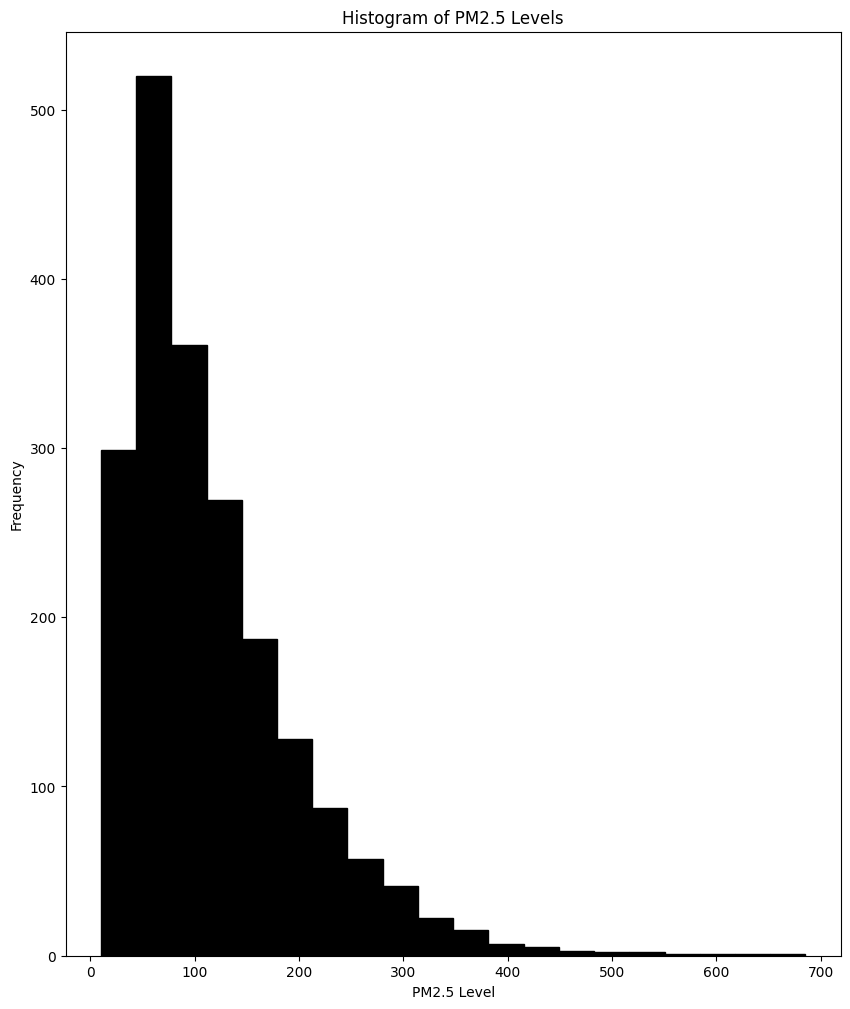

In [162]:
plt.figure(figsize=(10, 12))
plt.hist(delhi_data['PM2.5'], bins=20, color='black', edgecolor='black')
plt.xlabel('PM2.5 Level')
plt.ylabel('Frequency')
plt.title('Histogram of PM2.5 Levels')

plt.show()

> We can conclude that most of PM2.5 levels were found in 100-150 range which is still considered a poor result

# PM2.5 and PM10 levels  in Delhi on a monthly basis

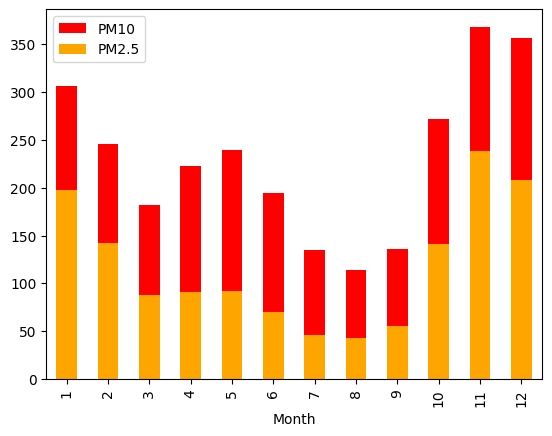

In [163]:
delhi_data[['PM2.5', 'PM10', 'Month']].groupby(['Month'])['PM10'].mean().plot(kind='bar',color="red", label='PM10')
delhi_data[['PM2.5', 'PM10', 'Month']].groupby(['Month'])['PM2.5'].mean().plot(kind='bar', color='orange', label='PM2.5')
plt.legend()
plt.show()

> We can observe from the above bar graph that the november month mostly sees peak pollution

# NO and NO2 levels in delhi 
# Time Series Plot

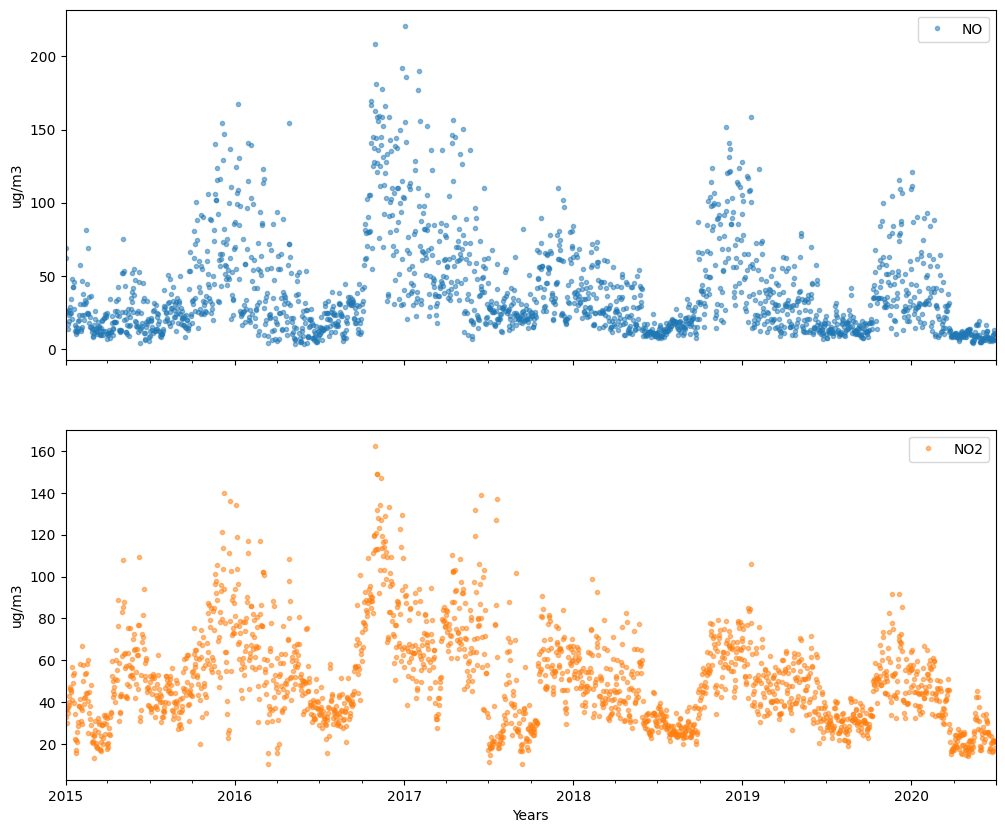

In [151]:
axes = delhi_data.set_index('Date')[np.array(['NO','NO2'])].plot(marker='.', alpha=0.5, linestyle='None', figsize=(12, 10), subplots=True)

for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylabel('ug/m3')

* ***NO*** level is high in Winter months 
* Highest ***NO*** level is seen in ***Jan 2017***  i.e 221.03


# Sulpher Dioxide (SO2) and Ozone(O3) levels in Delhi

In [165]:
df_so2 = delhi_data.groupby(['Year'])['SO2'].mean().reset_index().sort_values('Year').reset_index(drop=True)
df_o3 = delhi_data.groupby(['Year'])['O3'].mean().reset_index().sort_values('Year').reset_index(drop=True)


dfx = pd.concat([df_so2, df_o3], axis=1, join='outer')
dfxx = dfx.copy()
dfx = dfx[['SO2','O3']]
dfx = pd.concat([dfxx.iloc[:, :1], dfx], axis=1)
dfx

,Year,SO2,O3
0,2015,12.606904,57.395507
1,2016,18.792022,76.857869
2,2017,19.944260,38.694329
3,2018,13.642959,44.372438
4,2019,14.031205,38.941014
5,2020,13.912404,40.649891


In [166]:

dfx_long = dfx.melt(id_vars='Year', value_vars=dfx.columns[0:], var_name='Pollutants', value_name='Value')

px.bar(dfx_long, x='Year', y='Value', color='Pollutants', barmode='group')



# Air Quality Index of Delhi

An air quality index is used by government agencies to communicate to the public how polluted the air currently is or how polluted it is forecast to become. Public health risks increase as the AQI rises. Different countries have their own air quality indices, corresponding to different national air quality standards. 

*Source - Wikipedia*

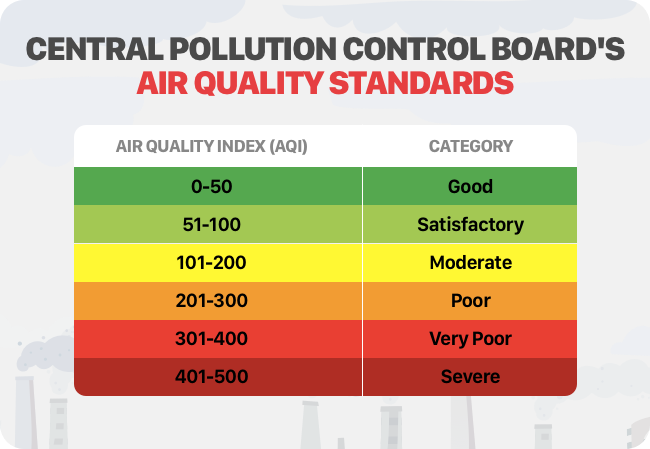

## AQI history of Delhi

In [154]:
fig = px.line(delhi_data, x="Date", y="AQI")
fig.show()

> Graph shows the variation of Air Quality Index of Delhi from 2015 to 2020.

# Effect on AQI levels of delhi due to lockdown

In [155]:
march24_2019=delhi_data[(delhi_data['Date'] >= '2019-02-23') & (delhi_data['Date'] <= '2019-05-15')]
march24_2020=delhi_data[(delhi_data['Date'] >= '2020-02-23') & (delhi_data['Date'] <= '2020-05-15')]

In [156]:
import plotly.graph_objects as go

# We Create a common reference year for both datasets
common_year = 2020

#Here I Extract the month and day from the 'Date' column for both datasets
march24_2019['Date'] = march24_2019['Date'].apply(lambda x: x.replace(year=common_year))
march24_2020['Date'] = march24_2020['Date'].apply(lambda x: x.replace(year=common_year))

# Create the Plotly figure
fig = go.Figure()

# Add traces for both years
fig.add_trace(go.Scatter(x=march24_2019['Date'], y=march24_2019['AQI'],
                         mode='lines+markers',
                         name='AQI - 2019'))
fig.add_trace(go.Scatter(x=march24_2020['Date'], y=march24_2020['AQI'],
                         mode='lines+markers',
                         name='AQI  - 2020'))

# Update layout
fig.update_layout(title='Comparison of AQI levels for the same date range in different years',
                  xaxis_title='Date',
                  yaxis_title='AQI',
                  xaxis=dict(tickformat='%b %d'),  # Format x-axis ticks to display month and day
                  )

# Show the plot
fig.show()


As AQI Levels changes POOR to SATISFACTORY due to lockdown as compared to last year

Even if the world was turned upside down due to the chaos created by Covid-19. Delhites got a chance to breathe fresh air after a long time. However This phase didn't last long as the lockdown was gradually lifted and everything started to return back to normal